<a href="https://colab.research.google.com/github/Marc86316/DataCamp/blob/main/Summary%20Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Intro to Statistic in Python**

In [ ]:
# Importing numpy, pandas and matplotlib.pyplot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Importing the course datasets from github
# paste Raw URL from github
deals_url = "https://raw.githubusercontent.com/Marc86316/DataCamp/refs/heads/main/dataset/amir_deals.csv"
happiness_url = "https://raw.githubusercontent.com/Marc86316/DataCamp/refs/heads/main/dataset/world_happiness.csv"
food_url = "https://raw.githubusercontent.com/Marc86316/DataCamp/refs/heads/main/dataset/food_consumption.csv"

amir_deals = pd.read_csv(deals_url)
world_happiness = pd.read_csv(happiness_url)
food_consumption = pd.read_csv(food_url)

## FutureWarning

在後續練習鐘，在使用 `groupby()`和 `.agg()`方法時，會遇到了關於 `np.var` 和 `np.std`和 `np.mean` 以及 `np.median` 的 `FutureWarning` 警告，該警告是確保程式碼的兼容性，因為在未來的 pandas 版本中，傳遞可呼叫物件（如 `np.var` 和 `np.std`）的行為將會改變。

##解决方案

| 方法 | 是否解决 `FutureWarning` | 可行性 |
|------|----------------|------|
| `agg(['mean', 'median'])` | ✅ 解决 | 最佳（直接使用 pandas 的方法） |
| `agg([np.mean, np.median])` | ❌ 觸發 | 不建議 |
| `agg([lambda x: np.mean(x), lambda x: np.median(x)])` | ✅ 解决 | 可行 |
| `agg([pd.Series.mean, pd.Series.median])` | ✅ 解决 | 可行 |


# **Summary Statistics 敘述統計學**

Summary statistics gives you the tools you need to boil down massive datasets to reveal the highlights.

**敘述統計學 Summary statistics** 價值是讓你能從海量資料中提取數據亮點

In this chapter, you'll explore summary statistics including mean, median, and standard deviation, and learn how to accurately interpret them. You'll also develop your critical thinking skills, allowing you to choose the best summary statistics for your data.

**學習目標**：平均值、中位數和標準差在內的統計數據，**準確描述資料性質** 與 **批判性思考** 是本章節核心。

## **What is Statistic? 什麼是統計學？**

### Descriptive and inferential statistics 描述統計和推論統計


**Descriptive and inferential statistics**

Statistics can be used to answer lots of different types of questions, but being able to identify which type of statistics is needed is essential to drawing accurate conclusions. In this exercise, you'll sharpen your skills by identifying which type is needed to answer each question.

**Instructions**

Identify which questions can be answered with descriptive statistics and which questions can be answered with inferential statistics.
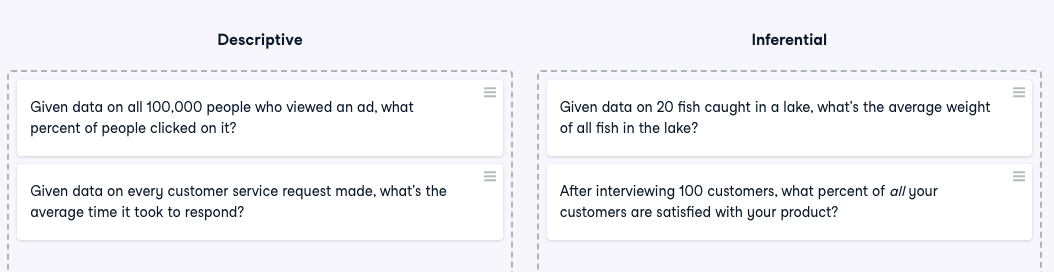

### Data type classification 資料類型分類

**Data type classification**

you learned about two main types of data: numeric and categorical. Numeric variables can be classified as either discrete or continuous, and categorical variables can be classified as either nominal or ordinal. These characteristics of a variable determine which ways of summarizing your data will work best.

**Instructions**

Map each variable to its data type by dragging each item and dropping it into the correct data type.

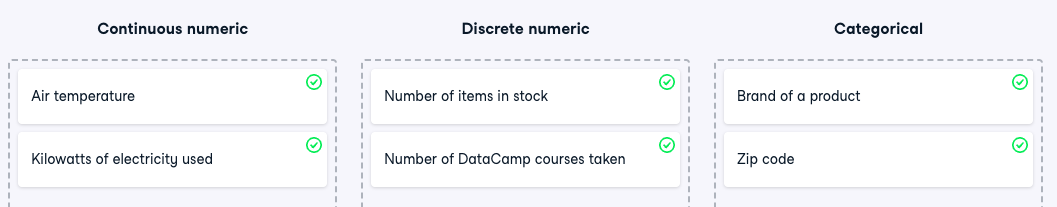

## **Measure of center 集中度**

### Mean and median

In this chapter, you'll be working with the `food_consumption` dataset from `2018 Food Carbon Footprint Index` by nu3. The `food_consumption` dataset contains the number of kilograms of food consumed per person per year in each country and food category (`consumption`), and its carbon footprint (`co2_emissions`) measured in kilograms of carbon dioxide, or CO2.

In this exercise, you'll compute measures of center to compare food consumption in the US and Belgium using your `pandas` and `numpy` skills.

`pandas` is imported as `pd` for you and `food_consumption` is pre-loaded.

**Instructions**

* Subset `food_consumption` to get the rows where the `country` is `'USA'`.
* Calculate the mean of food `consumption` in the `usa_consumption` DataFrame, which is already created for you.
* Calculate the median of food `consumption` in the `usa_consumption` DataFrame.

In [ ]:
# Subset country for USA: usa_consumption
usa_consumption = food_consumption[food_consumption['country']=='USA']

# Calculate mean consumption in USA
print(np.mean(usa_consumption['consumption']))

# Calculate median consumption in USA
print(np.median(usa_consumption['consumption']))

44.650000000000006
14.58


### Mean vs. median

you learned that the mean is the sum of all the data points divided by the total number of data points, and the median is the middle value of the dataset where 50% of the data is less than the median, and 50% of the data is greater than the median. In this exercise, you'll compare these two measures of center.


**Instructions 1/4**

* Subset `food_consumption` to get the rows where `food_category` is `'rice'`.
* Create a histogram of `co2_emission` in `rice_consumption` DataFrame and show the plot.

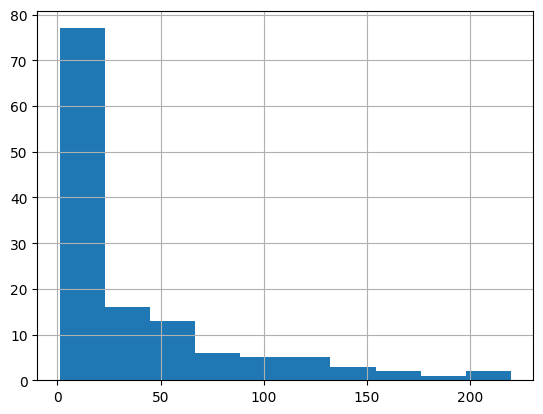

In [ ]:
# Subset for food_category equals rice
rice_consumption = food_consumption[food_consumption['food_category']=='rice']

# Histogram of co2_emission for rice and show plot
# co2_emission= food_consumption[food_consumption['co2_emission']=='rice']
# plt.plot(x=rice_consumption, y=co2_emission, type="hist")
rice_consumption['co2_emission'].hist()
plt.show()

**Instructions 2/4**

**Question**

Take a look at the histogram you just created of different countries' CO2 emissions for rice. Which of the following terms best describes the shape of the data?

**Possible answers**

No skew

Left-skewed

Right-skewed ✅

**Instructions 3/4**

Use `.agg()` to calculate the mean and median of `co2_emission` for rice.

In [ ]:
# Subset for food_category equals rice
rice_consumption = food_consumption[food_consumption['food_category'] == 'rice']

# Calculate mean and median of co2_emission with .agg()
print(rice_consumption['co2_emission'].agg(['mean','median']))

mean      37.591615
median    15.200000
Name: co2_emission, dtype: float64


**Instructions 4/4**

**Question**

Given the skew of this data, what measure of central tendency best summarizes the kilograms of CO2 emissions per person per year for rice?

**Possible answers**


Mean

Median ✅

Both mean and median

## **Measures of spread 離度**

### Variance and standard deviation

Variance and standard deviation are two of the most common ways to measure the spread of a variable, and you'll practice calculating these in this exercise. Spread is important since it can help inform expectations. For example, if a salesperson sells a mean of 20 products a day, but has a standard deviation of 10 products, there will probably be days where they sell 40 products, but also days where they only sell one or two. Information like this is important, especially when making predictions.




**Instructions**

*   Calculate the variance and standard deviation of `co2_emission` for each `food_category` with the `.groupby()` and .`agg() `methods; compare the values of variance and standard deviation.
*   Create a histogram of `co2_emission` for the beef in `food_category` and show the plot.
* Create a histogram of `co2_emission` for the eggs in `food_category` and show the plot.

                        var         std
food_category                          
beef           88748.408132  297.906710
dairy          17671.891985  132.935669
eggs              21.371819    4.622966
fish             921.637349   30.358481
lamb_goat      16475.518363  128.356996
nuts              35.639652    5.969895
pork            3094.963537   55.632396
poultry          245.026801   15.653332
rice            2281.376243   47.763754
soybeans           0.879882    0.938020
wheat             71.023937    8.427570


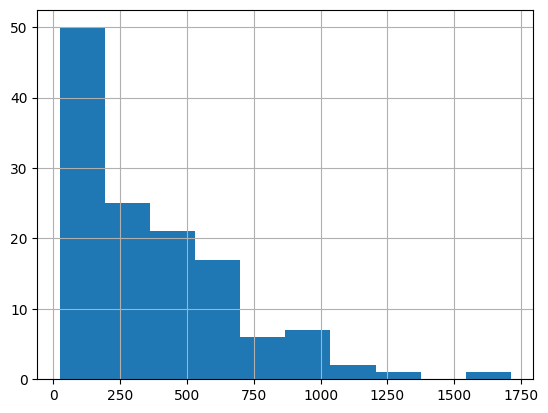

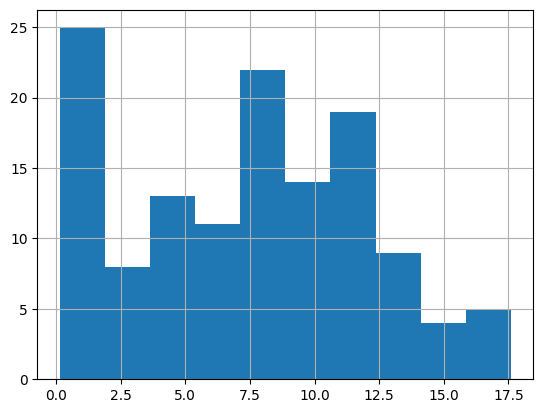

In [ ]:
# Print variance and sd of co2_emission for each food_category
print(food_consumption.groupby('food_category')['co2_emission'].agg(['var', 'std']))

# Create histogram of co2_emission for food_category 'beef'
food_consumption[food_consumption['food_category'] == 'beef']['co2_emission'].hist()
plt.show()

# Create histogram of co2_emission for food_category 'eggs'
food_consumption[food_consumption['food_category'] == 'eggs']['co2_emission'].hist()
plt.show()

### Quartiles, quantiles, and quintiles
Quantiles are a great way of summarizing numerical data since they can be used to measure center and spread, as well as to get a sense of where a data point stands in relation to the rest of the data set. For example, you might want to give a discount to the 10% most active users on a website.

In this exercise, you'll calculate quartiles, quintiles, and deciles, which split up a dataset into 4, 5, and 10 pieces, respectively.

**Instructions 1/3**

Calculate the quartiles of the `co2_emission` column of `food_consumption`.

In [ ]:
# Calculate the quartiles of co2_emission
import numpy as np

# Example of calculating quartiles
quartiles = np.quantile(food_consumption['co2_emission'], [0,0.25, 0.5, 0.75,1])
print(quartiles)

[   0.        5.21     16.53     62.5975 1712.    ]


 **Instructions 2/3**

Calculate the six quantiles that split up the data into 5 pieces (quintiles) of the `co2_emission` column of `food_consumption`.



In [ ]:
# Calculate the quintiles of co2_emission
print(np.quantile(food_consumption['co2_emission'], [0,0.2, 0.4, 0.6,0.8,1]))

[   0.       3.54    11.026   25.59    99.978 1712.   ]


**Instructions 3/3**

Calculate the eleven quantiles of `co2_emission` that split up the data into ten pieces (deciles).

In [ ]:
# Calculate the deciles of co2_emission
print(np.quantile(food_consumption['co2_emission'], np.linspace(0, 1, 11)))

[0.00000e+00 6.68000e-01 3.54000e+00 7.04000e+00 1.10260e+01 1.65300e+01
 2.55900e+01 4.42710e+01 9.99780e+01 2.03629e+02 1.71200e+03]


### Finding outliers using IQR

Outliers can have big effects on statistics like mean, as well as statistics that rely on the mean, such as variance and standard deviation. Interquartile range, or IQR, is another way of measuring spread that's less influenced by outliers. IQR is also often used to find outliers. If a value is less than $Q_1 - 1.5 \times IQR$
or greater than $Q_3 + 1.5 \times IQR$, it's considered an outlier. In fact, this is how the lengths of the whiskers in a `matplotlib` box plot are calculated.

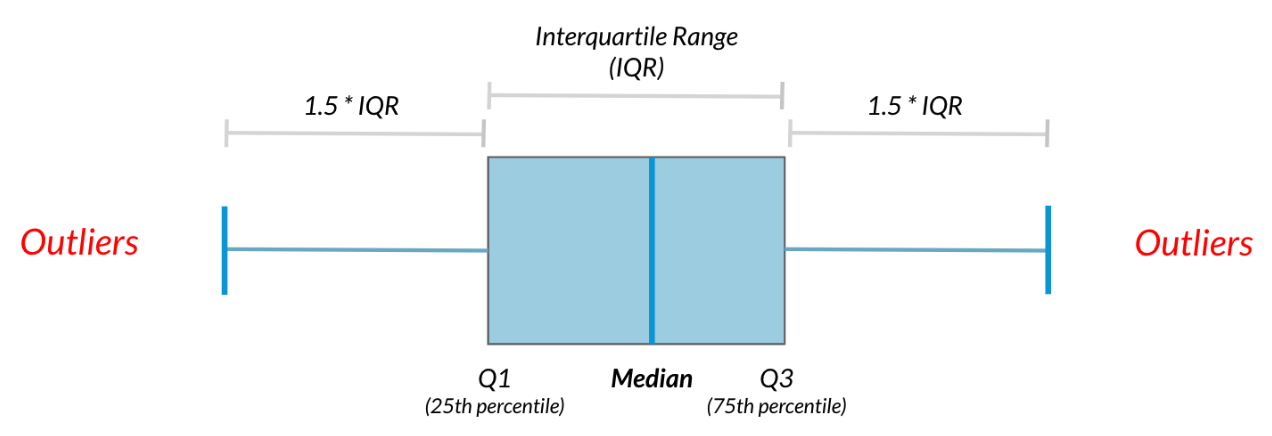

In this exercise, you'll calculate IQR and use it to find some outliers. `pandas` as pd and `numpy` as `np` are loaded and `food_consumption` is available

**Instructions 1/4**

* Calculate the total `co2_emission` per country by grouping by country and taking the sum of `co2_emission`. Store the resulting DataFrame as `emissions_by_country`.

In [ ]:
# Calculate total co2_emission per country: emissions_by_country
emissions_by_country = food_consumption.groupby('country')['co2_emission'].sum()

print(emissions_by_country)

country
Albania      1777.85
Algeria       707.88
Angola        412.99
Argentina    2172.40
Armenia      1109.93
              ...   
Uruguay      1634.91
Venezuela    1104.10
Vietnam       641.51
Zambia        225.30
Zimbabwe      350.33
Name: co2_emission, Length: 130, dtype: float64


**Instructions 2/4**

* Compute the first and third quartiles of `emissions_by_country` and store these as `q1` and `q3`.
* Calculate the interquartile range of `emissions_by_country` and store it as `iqr`.

In [ ]:
# Calculate total co2_emission per country: emissions_by_country
emissions_by_country = food_consumption.groupby('country')['co2_emission'].sum()

# Compute the first and third quartiles and IQR of emissions_by_country
q1 = np.quantile(emissions_by_country,0.25)
q3 = np.quantile(emissions_by_country,0.75)
iqr = np.quantile(emissions_by_country,0.75) - np.quantile(emissions_by_country,0.25)

**Instructions 3/4**

* Calculate the lower and upper cutoffs for outliers of `emissions_by_country`, and store these as `lower` and `upper`

In [ ]:
# Calculate total co2_emission per country: emissions_by_country
emissions_by_country = food_consumption.groupby('country')['co2_emission'].sum()

# Compute the first and third quantiles and IQR of emissions_by_country
q1 = np.quantile(emissions_by_country, 0.25)
q3 = np.quantile(emissions_by_country, 0.75)
iqr = q3 - q1

# Calculate the lower and upper cutoffs for outliers
lower = q1-1.5*iqr
upper = q3+1.5*iqr

**Instructions 4/4**


* Subset `emissions_by_country` to get countries with a total emission greater than the `upper` cutoff or a total emission less than the `lower` cutoff.

In [ ]:
# Calculate total co2_emission per country: emissions_by_country
emissions_by_country = food_consumption.groupby('country')['co2_emission'].sum()

# Compute the first and third quantiles and IQR of emissions_by_country
q1 = np.quantile(emissions_by_country, 0.25)
q3 = np.quantile(emissions_by_country, 0.75)
iqr = q3 - q1

# Calculate the lower and upper cutoffs for outliers
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

# Subset emissions_by_country to find outliers
outliers = emissions_by_country[(emissions_by_country< lower) | (emissions_by_country > upper)]
print(outliers)

country
Argentina    2172.4
Name: co2_emission, dtype: float64


# **Random Numbers and Probability 隨機與機率**
章節概要：二元結果事件進行二項分佈建模（分析）

In this chapter, you'll learn how to generate random samples and measure chance using probability. You'll work with real-world sales data to calculate the probability of a salesperson being successful.

Finally, you’ll use the binomial distribution to model events with binary outcomes.

## What are the Chances

### With or without replacement?
In the video, you learned about two different ways of taking samples: with replacement and without replacement. Although it isn't always easy to tell which best fits various situations, it's important to correctly identify this so that any probabilities you report are accurate. In this exercise, you'll put your new knowledge to the test and practice figuring this out.

**Instructions**

For each scenario, decide whether it's sampling with **replacement** or sampling **without replacement**.

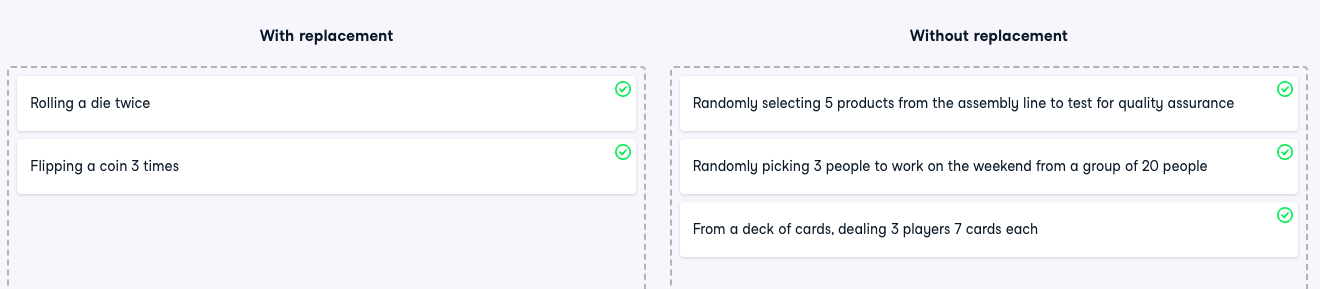


### Calculating probabilities

You're in charge of the sales team, and it's time for performance reviews, starting with Amir. As part of the review, you want to randomly select a few of the deals that he's worked on over the past year so that you can look at them more deeply. Before you start selecting deals, you'll first figure out what the chances are of selecting certain deals.

Recall that the probability of an event can be calculated by

$$ P(\text{event}) = \frac{\# \text{ways event can happen}}{\text{total } \# \text{ of possible outcomes}} $$

`amir_deals` is available.

**Instructions 1/3**


*   Count the number of deals Amir worked on for each `product` type using `.value_counts()` and store in `counts`.



In [ ]:
# Count the deals for each product
counts = amir_deals['product'].value_counts()
print(counts)

product
Product B    62
Product D    40
Product A    23
Product C    15
Product F    11
Product H     8
Product I     7
Product E     5
Product N     3
Product G     2
Product J     2
Name: count, dtype: int64


**Instructions 2/3**

Calculate the probability of selecting a deal for the different product types by dividing the counts by the total number of deals Amir worked on. Save this as `probs`.

1. 統計**每種產品類型的交易數量**。
2. 將**每種產品類型的交易數量**除以 Amir 經手的**所有交易總數**，即可得到該產品類型交易被選中的機率。

$$ P(\text{Product Type}) = \frac{\text{Number of Deals for Product Type}}{\text{Total Number of Deals}} $$

這邊所考慮的機率一般來說是：
* **邊緣機率 (Marginal Probability)**：指單一事件發生的機率，而不考慮任何其他事件（例如交易的日期、客戶等等）。

* **無條件機率 (Unconditional Probability)**：指一個事件發生的機率，不受任何其他條件限制（沒有添加任何條件）。

**額外思考**

若是要計算**某特定"商品類型"的交易**中，**每種產**品被選中的條件機率或分組機率：

$$ P(\text{Product Type}) = \frac{\text{Number of Deals for Each Product Type}}{\text{Total Number of Each Product Deals}} $$

* **條件機率 (Conditional Probability)**：已知另一個事件發生的情況下，某個事件發生的機率。
已知交易是關於'Laptops'，那麼選擇 'MacBook Pro' 的機率是多少。

* **分組機率 (Grouped Probability)**：指將數據分成不同的組別，然後計算每個組別中特定事件發生的機率。
我們想比較 'Laptops' 類別中，'MacBook Pro' 和 'Dell XPS' 的被選中機率，以及 'Phones' 類別中，'iPhone' 和 'Samsung Galaxy' 的被選中機率。

In [ ]:
# Count the deals for each product
counts = amir_deals['product'].value_counts()
# Calculate probability of picking a deal with each product
probs =  counts / amir_deals.shape[0]
print(probs)

product
Product B    0.348315
Product D    0.224719
Product A    0.129213
Product C    0.084270
Product F    0.061798
Product H    0.044944
Product I    0.039326
Product E    0.028090
Product N    0.016854
Product G    0.011236
Product J    0.011236
Name: count, dtype: float64


In [ ]:
# Count the deals for each product
counts = amir_deals['product'].value_counts()
# unique_products = amir_deals['product'].nunique()
# print(unique_products)

# Calculate probability of picking a deal with each product
probs = amir_deals['product'].value_counts(normalize= True)

print(probs)

product
Product B    0.348315
Product D    0.224719
Product A    0.129213
Product C    0.084270
Product F    0.061798
Product H    0.044944
Product I    0.039326
Product E    0.028090
Product N    0.016854
Product G    0.011236
Product J    0.011236
Name: proportion, dtype: float64


**Instructions 3/3**

**Question**

If you randomly select one of Amir's deals, what's the probability that the deal will involve Product C? (still a marginal probability or unconditional probability)

Possible answers


* 15%

* 80.43%

* 8.43% ✅

* 22.5%

* 124.3%


### Sampling deals

In the previous exercise, you counted the deals Amir worked on. Now it's time to randomly pick five deals so that you can reach out to each customer and ask if they were satisfied with the service they received. You'll try doing this both with and without replacement.

Additionally, you want to make sure this is done randomly and that it can be reproduced in case you get asked how you chose the deals, so you'll need to set the random seed before sampling from the deals.

**Instructions 1/3**

* Set the random seed to 24.
* Take a sample of 5 deals without replacement and store them as sample_without_replacement.

In [ ]:
# # Set random seed
# ____

# # Sample 5 deals without replacement
# sample_without_replacement = ____
# print(sample_without_replacement)

In [ ]:
# Set random seed
np.random.seed(24)

# Sample 5 deals without replacement
sample_without_replacement = amir_deals.sample(5)
print(sample_without_replacement)

     Unnamed: 0    product   client status   amount  num_users
127         128  Product B  Current    Won  2070.25          7
148         149  Product D  Current    Won  3485.48         52
77           78  Product B  Current    Won  6252.30         27
104         105  Product D  Current    Won  4110.98         39
166         167  Product C      New   Lost  3779.86         11


**Instructions 2/3**

* Take a sample of 5 deals with replacement and save as sample_with_replacement.

In [ ]:
# Set random seed
np.random.seed(24)

# Sample 5 deals with replacement
sample_with_replacement = amir_deals.sample(5, replace= True)
print(sample_with_replacement)

     Unnamed: 0    product   client status   amount  num_users
162         163  Product D  Current    Won  6755.66         59
131         132  Product B  Current    Won  6872.29         25
87           88  Product C  Current    Won  3579.63          3
145         146  Product A  Current    Won  4682.94         63
145         146  Product A  Current    Won  4682.94         63


**Instructions 3/3**

**Question**


What type of sampling is better to use for this situation?

**Possible answers**


* With replacement

* Without replacement ✅

* It doesn't matter


## Discrete distributions

**Creating a probability distribution**

---


A new restaurant opened a few months ago, and the restaurant's management wants to optimize its seating space based on the size of the groups that come most often. On one night, there are 10 groups of people waiting to be seated at the restaurant, but instead of being called in the order they arrived, they will be called randomly. In this exercise, you'll investigate the probability of groups of different sizes getting picked first. Data on each of the ten groups is contained in the restaurant_groups DataFrame.


---


Remember that expected value can be calculated by multiplying each possible outcome with its corresponding probability and taking the sum. The restaurant_groups data is available. `pandas `is loaded as `pd`, `numpy` is loaded as `np`, and `matplotlib.pyplot` is loaded as `plt`.